In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Load data
edge_list = pd.read_csv('data/graph_data.csv')
centrality_scores = pd.read_csv('data/centrality.csv')
clusters = pd.read_csv('data/clusters.csv')

print(edge_list.head())
print(centrality_scores.head())
print(clusters.head())

    0   1
0   2   3
1   4   5
2   6   7
3   8   9
4  10  11
    node  centrality
0  13181    0.000046
1   1909    0.000046
2  20750    0.000046
3  15254    0.000046
4   1897    0.000046
   cluster_id  node
0           0     0
1           0     1
2           0     2
3           0     3
4           0     4


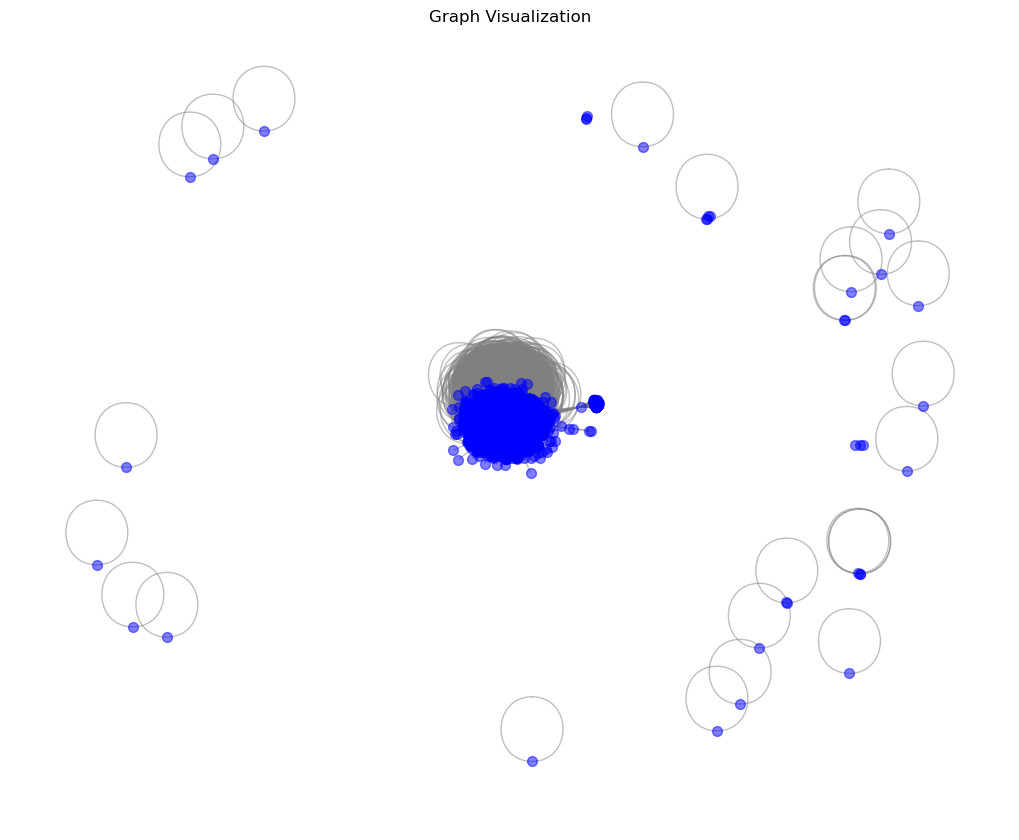

In [23]:
G = nx.from_pandas_edgelist(df, "0", "1")

# Visualize the graph with basic layout
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=50, alpha=0.5, edge_color='gray', node_color='blue', with_labels=False)
plt.title('Graph Visualization')
plt.show()

In [26]:
# Add centrality scores to the graph nodes as attributes
centrality_dict = centrality_scores.set_index('node')['centrality'].to_dict()
nx.set_node_attributes(G, centrality_dict, 'centrality')

In [ ]:
# Visualize the graph with centrality scores
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # positions for all nodes
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes, node_color=[G.nodes[n]['centrality'] for n in G.nodes],
                            with_labels=False, node_size=100, cmap=plt.cm.plasma)
plt.colorbar(nc)
plt.axis('off')
plt.title('Graph Visualization with Centrality')
plt.show()